# Intialize

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time


# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf)
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,
 
}




common_params = {

'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
    

# 'delta for galaxies' : "200c",
# 'delta for matter density' : "200c",
# 'delta for electron density':"200c",    

'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non_linear' : 'hmcode',

'hm_consistency' : 1,
# 'x_outSZ': 4.,
# 'truncate_wrt_rvir':0,
}


import os 
path_to_class_sz = os.getcwd() + '/../../class_sz/'

# a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

In [23]:
import classy_sz
classy_sz.__file__


'/Users/boris/opt/miniconda3/lib/python3.9/site-packages/classy_sz-2.9.4-py3.9-macosx-11.0-arm64.egg/classy_sz.cpython-39-darwin.so'

In [37]:
ksz_params = {
'output': 'tau_gal_1h,tau_gal_2h',

# 'pressure profile':'B16',
# 'gas profile mode' :'agn',
    
"ell_min" : 2,
"ell_max" : 20000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e10, 
'M_max' : 5e15,

'gas profile':'B16',
'gas profile mode' : 'custom', # important to read values of parameters
'use_xout_in_density_profile_from_enclosed_mass' : 1,
'n_z_m_to_xout' : 30,
'n_mass_m_to_xout' : 30,

    

'n_m_density_profile' :30, # default: 100, decrease for faster
'n_z_density_profile' :30, # default: 100, decrease for faster


    
'k_min_samp_fftw' : 1e-3,
'k_max_samp_fftw' : 1e3,
'N_samp_fftw' : 1024,
    
    
'hm_consistency' : 1,
    
    
'use_fft_for_profiles_transform' : 1,
    
    
'x_min_gas_density_fftw' : 1e-6,
'x_max_gas_density_fftw' : 1e5,    
    
}

HOD_blue = {
'sigma_log10M_HOD': 0.68660116,
'alpha_s_HOD':    1.3039425,
'M1_prime_HOD': 10**12.701308, # Msun/h
'M_min_HOD': 10**11.795964, # Msun/h
'M0_HOD' :0,
'x_out_truncated_nfw_profile_satellite_galaxies':  1.0868995,
'f_cen_HOD' : 1., 
    
'galaxy_sample': 'unwise',
'galaxy_sample_id': "blue",
'UNWISE_dndz_file': path_to_class_sz +"/class_sz_auxiliary_files/normalised_dndz_cosmos.txt"
}

In [38]:
%%time

M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set(ksz_params)
M.set(HOD_blue)
M.set({
'use_fft_for_profiles_transform' : 1,
'ndim_redshifts':30, ## precision parameter -- how many z in redshift grid.
})
M.compute_class_szfast() # fast mode works
# M.compute() # slow mode works

CPU times: user 1.64 s, sys: 78.6 ms, total: 1.72 s
Wall time: 389 ms


In [39]:
l = np.asarray(M.cl_sz()['ell'])
cl_eg_1h = np.asarray(M.cl_eg()['1h'])/l_to_dl(l)
cl_eg_2h = np.asarray(M.cl_eg()['2h'])/l_to_dl(l)


In [40]:
l

array([2.00000000e+00, 2.44280552e+00, 2.98364940e+00, 3.64423760e+00,
       4.45108186e+00, 5.43656366e+00, 6.64023385e+00, 8.11039993e+00,
       9.90606485e+00, 1.20992949e+01, 1.47781122e+01, 1.80500270e+01,
       2.20463528e+01, 2.69274761e+01, 3.28892935e+01, 4.01710738e+01,
       4.90650604e+01, 5.99282001e+01, 7.31964689e+01, 8.94023690e+01,
       1.09196300e+02, 1.33372662e+02, 1.62901737e+02, 1.98968631e+02,
       2.43020835e+02, 2.96826318e+02, 3.62544484e+02, 4.42812832e+02,
       5.40852815e+02, 6.60599120e+02, 8.06857587e+02, 9.85498082e+02,
       1.20369008e+03, 1.47019038e+03, 1.79569458e+03, 2.19326632e+03,
       2.67886153e+03, 3.27196886e+03, 3.99639179e+03, 4.88120396e+03,
       5.96191597e+03, 7.28190061e+03, 8.89413350e+03, 1.08633192e+04,
       1.32684880e+04, 1.62061679e+04, 1.97942581e+04])

(0.0, 1e-10)

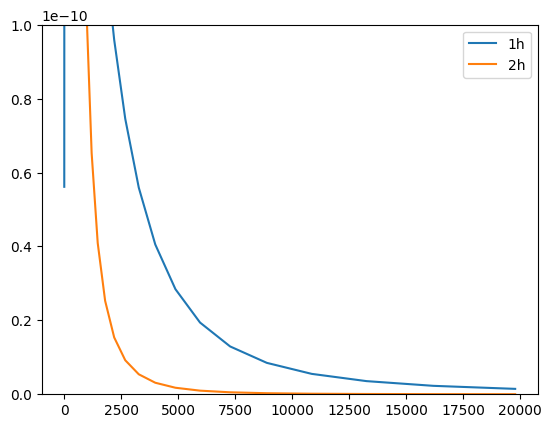

In [41]:
plt.plot(l,cl_eg_1h,label='1h')
plt.plot(l,cl_eg_2h,label='2h')
plt.legend()
# plt.yscale('log')
# plt.yscale('log')
plt.ylim(0,1e-10)

In [42]:
np.savetxt("cleg_l_1h_2h_1p2h.txt",np.c_[l,cl_eg_1h,cl_eg_2h,cl_eg_1h+cl_eg_2h])